In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Datasets\\[0831] SVC\\train\\'

In [3]:
categories = ['fragile', 'non_fragile']

In [4]:
data = []

for category in categories:
    file_path = os.path.join(path, category)
    print(file_path)
    label = categories.index(category)
    
    for img in os.listdir(file_path):
        imgpath = os.path.join(file_path, img)
        
        try: 
            pet_img = cv2.imread(imgpath, 0)
            pet_img = cv2.resize(pet_img, (200,200))

            image = np.array(pet_img).flatten()

            data.append([image, label])
        except Exception as e:
            pass
                             
print(len(data))   

C:\Users\yukir\Documents\Monicas_workspace\Datasets\[0831] SVC\train\fragile
C:\Users\yukir\Documents\Monicas_workspace\Datasets\[0831] SVC\train\non_fragile
497


In [5]:
pick_in = open('0831 data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [6]:
#loadijg file
pick_in = open('0831 data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [7]:
# random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

#### train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

#### model

In [9]:
model = SVC(C=1, kernel = 'poly', gamma='auto', random_state=42)
model.fit(X_train, y_train)


prediction = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(accuracy)

0.77


In [10]:
#save model
pick = open('0830_SVC_077.sav', 'wb')
pickle.dump(model, pick)
pick.close()

In [11]:
print('prediction: ',categories[prediction[0]])

prediction:  non_fragile


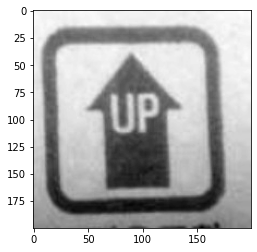

In [12]:
pred_img = X_test[0].reshape(200,200)
plt.imshow(pred_img, cmap='gray')
plt.show()

#### model evaluation

In [13]:
from sklearn.model_selection import cross_val_predict

In [14]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=5)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[145,  65],
       [ 75, 112]], dtype=int64)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names= categories))

              precision    recall  f1-score   support

     fragile       0.79      0.83      0.81        60
 non_fragile       0.73      0.68      0.70        40

    accuracy                           0.77       100
   macro avg       0.76      0.75      0.76       100
weighted avg       0.77      0.77      0.77       100



In [19]:
from sklearn.metrics import precision_score, recall_score

In [20]:
precision_score(y_train, y_train_pred)

0.632768361581921

In [21]:
recall_score(y_train, y_train_pred)

0.5989304812834224

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.6153846153846153

#### trade off

In [23]:
some_fragile = features[0]

y_scores = model.decision_function([some_fragile])
y_scores

array([-0.99983188])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
y_scores = cross_val_predict(model, X_train, y_train, cv=5)

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [27]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label ='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.legend()

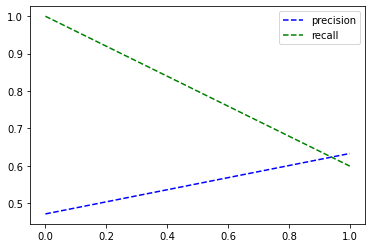

In [28]:
plot_precision_recall_vs_threshold(precision, recalls, thresholds)
plt.show()

In [29]:
threshold_90_precision = thresholds[np.argmax(precision >=90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [30]:
precision_score(y_train, y_train_pred_90)

0.47103274559193953

In [31]:
recall_score(y_train, y_train_pred_90)

1.0

#### ROC

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

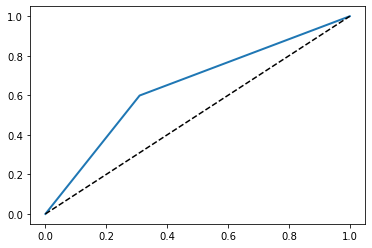

In [33]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.6447033358798064

#### GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

In [37]:
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(C=1, gamma='auto', kernel='poly', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [41]:
test_score = grid_search.score(X_test, y_test)
print("테스트 세트 점수: {:.2f}".format( test_score ))
print("최적 매개변수: {}".format(grid_search.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

테스트 세트 점수: 0.77
최적 매개변수: {'C': 0.001, 'gamma': 0.001}
최고 교차 검증 점수: 0.65


#### load model + validation visual

In [42]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.01)

In [43]:
len(X_test)

5

prediction :  fragile


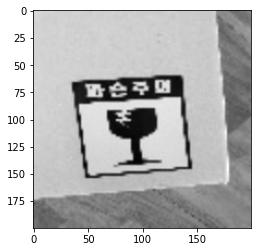

prediction :  non_fragile


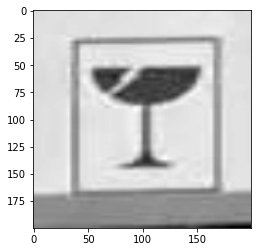

prediction :  non_fragile


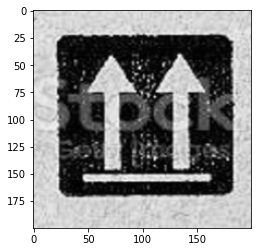

prediction :  non_fragile


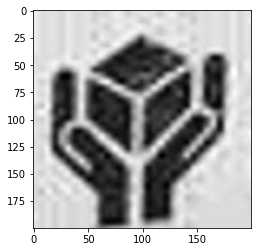

prediction :  non_fragile


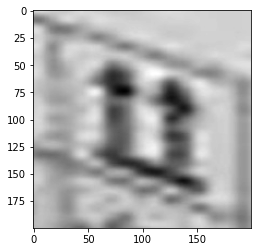

In [44]:
#load model

pick_in3 = open('0830_SVC_077.sav', 'rb')
model_test = pickle.load(pick_in3)
pick_in3.close()

categories = ['fragile', 'non_fragile']

prediction = model_test.predict(X_test)
accuracy = model_test.score(X_test, y_test)

# print('accuracy', accuracy)
# print('prediction: ',categories[prediction[0]])
# print('prediction: ',categories[prediction[1]])
# print('prediction: ',categories[prediction[2]])
# print('prediction: ',categories[prediction[3]])
# print('prediction: ',categories[prediction[4]])


for num, i in enumerate (X_test):
    pred_img = X_test[num].reshape(200,200)
    print('prediction : ', categories[prediction[num]])
    plt.imshow(pred_img, cmap='gray')
    plt.show()

#### unseen_test + visual

In [45]:
test_path ='C:\\Users\\yukir\\Documents\\Monicas_workspace\\Datasets\\[0831] SVC\\un_seen test\\'

In [46]:
categories = ['fragile', 'non_fragile']

In [47]:
test_data = []

for category in categories:
    file_path = os.path.join(test_path, category)
    print(file_path)
    label = categories.index(category)
    
    for img in os.listdir(file_path):
        imgpath = os.path.join(file_path, img)
        
        try: 
            pet_img = cv2.imread(imgpath, 0)
            pet_img = cv2.resize(pet_img, (200,200))

            image = np.array(pet_img).flatten()

            test_data.append([image, label])
        except Exception as e:
            pass
                             
print(len(test_data))   

C:\Users\yukir\Documents\Monicas_workspace\Datasets\[0831] SVC\un_seen test\fragile
C:\Users\yukir\Documents\Monicas_workspace\Datasets\[0831] SVC\un_seen test\non_fragile
72


In [48]:
pick_in = open('0831 unseen_test.pickle', 'wb')
pickle.dump(test_data, pick_in)
pick_in.close()

In [49]:
#loadijg file
pick_in = open('0831 unseen_test.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [50]:
# random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [51]:
type(features)

list

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.5)

In [74]:
len(X_test)

36

0.6666666666666666
prediction :  non_fragile


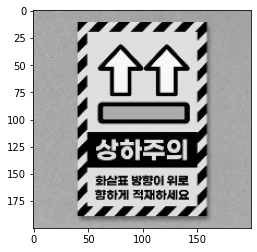

prediction :  non_fragile


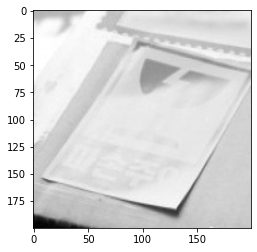

prediction :  fragile


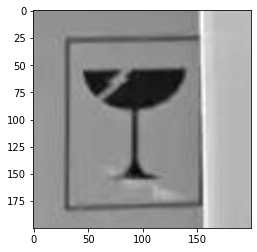

prediction :  fragile


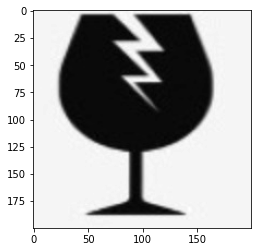

prediction :  non_fragile


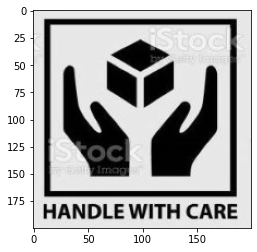

prediction :  non_fragile


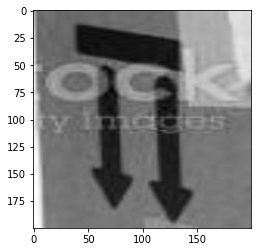

prediction :  fragile


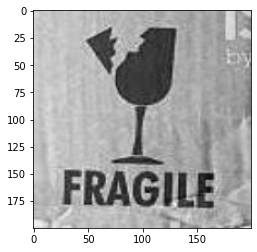

prediction :  fragile


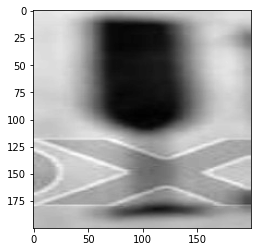

prediction :  fragile


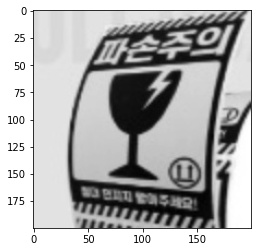

prediction :  non_fragile


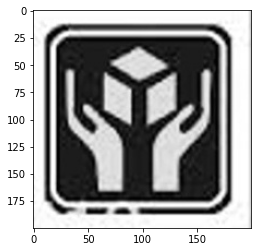

prediction :  fragile


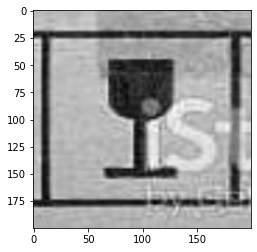

prediction :  fragile


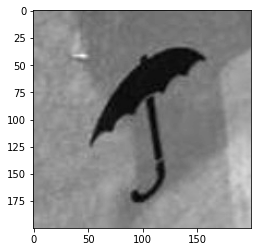

prediction :  fragile


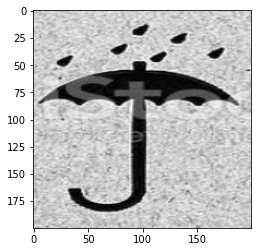

prediction :  fragile


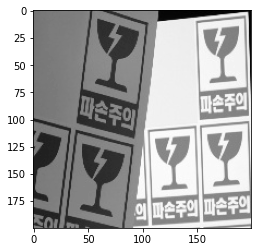

prediction :  fragile


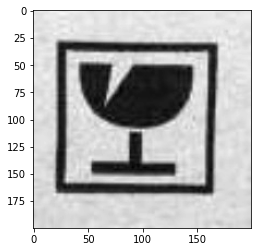

prediction :  non_fragile


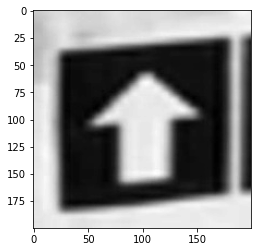

prediction :  fragile


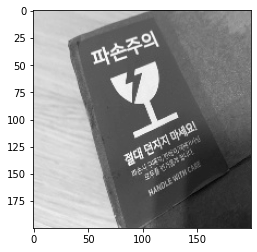

prediction :  fragile


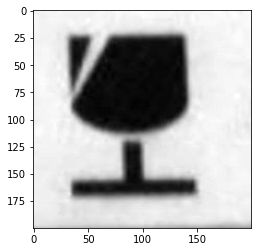

prediction :  fragile


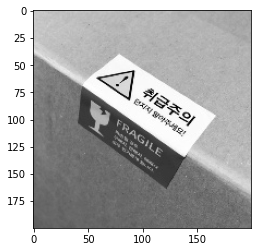

prediction :  fragile


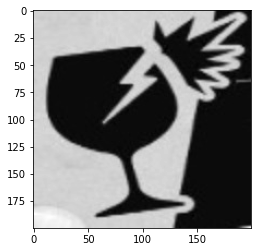

prediction :  non_fragile


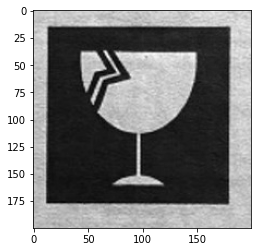

prediction :  fragile


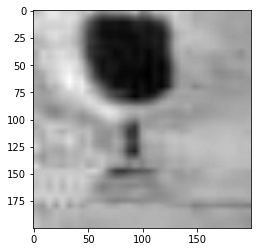

prediction :  non_fragile


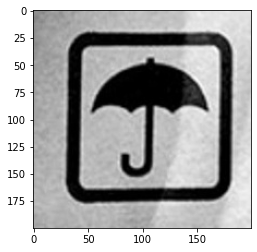

prediction :  fragile


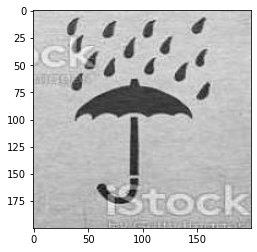

prediction :  fragile


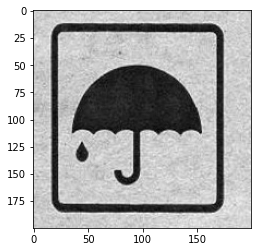

prediction :  non_fragile


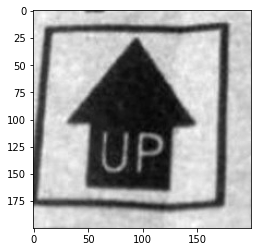

prediction :  fragile


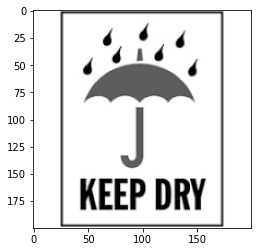

prediction :  non_fragile


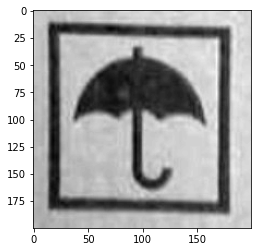

prediction :  fragile


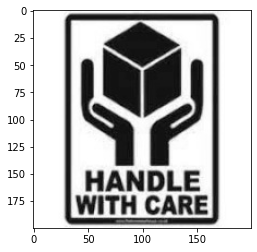

prediction :  fragile


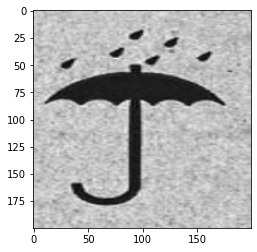

prediction :  fragile


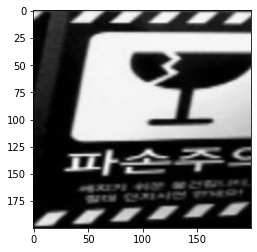

prediction :  fragile


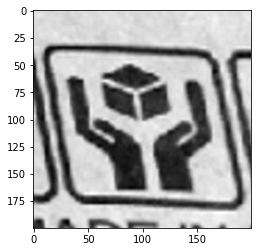

prediction :  non_fragile


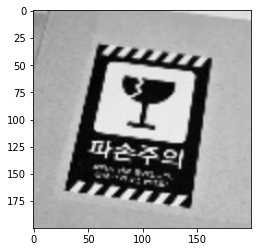

prediction :  fragile


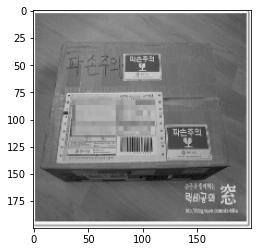

prediction :  fragile


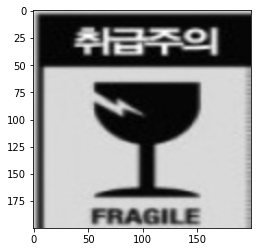

prediction :  fragile


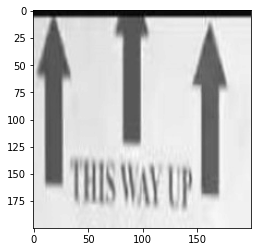

In [76]:
#load model

pick_in3 = open('0830_SVC_077.sav', 'rb')
model_test = pickle.load(pick_in3)
pick_in3.close()

categories = ['fragile', 'non_fragile']

prediction = model_test.predict(X_test)
accuracy = model_test.score(X_test, y_test)

print(accuracy)
for num, i in enumerate (X_test):
    pred_img = X_test[num].reshape(200,200)
    print('prediction : ', categories[prediction[num]])
    plt.imshow(pred_img, cmap='gray')
    plt.show()